In [1]:
#loading preprocessed data
import numpy as np
import os
import cv2
import gc

In [2]:
#loading
data = np.load('./Dataset/data_preprocess.npz')

In [3]:
x = data['arr_0']
y = data['arr_1']

#approxtime 4m17.4s

In [4]:
x.shape, y.shape

((134097, 100, 100, 3), (134097,))

In [5]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth',
       'No_Mask'], dtype='<U15')

In [6]:
#processing y
from sklearn.preprocessing import OneHotEncoder          #used to convert data into one-hot encoding format

In [7]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))     #our array is in 1D format we need to convert it to 2D so we use reshape(-1,1) converting that to coloum metrix

In [8]:
#y_onehot   #checkstatment #o/p is in form : 133097x4   4 coloums are there we need to convert it to array we use toarray()
y_array = y_onehot.toarray()

In [9]:
#y_array.shape    #o/p (133097, 2)
y_array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [10]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_array,test_size=0.2,random_state=42)      #approx 72min 39.2sec

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape               #checkstatment

((107277, 100, 100, 3), (26820, 100, 100, 3), (107277, 5), (26820, 5))

In [12]:
#deep learning model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
#approxtime 3m 42.9s

In [17]:
#CNN code
model = Sequential([                     #layers_follows_in_order
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(5,activation='sigmoid')
])

#compiling cnn model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [18]:
model.summary()      #checkstatment

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 64)      

In [19]:
#training cnn model
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10)       #approxtime 205min 32sec

Epoch 1/10
3576/3576 [==============================] - 1712s 477ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0192 - val_accuracy: 0.9938
Epoch 2/10
3576/3576 [==============================] - 1447s 405ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0141 - val_accuracy: 0.9957
Epoch 3/10
3576/3576 [==============================] - 1384s 386ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0117 - val_accuracy: 0.9966
Epoch 4/10
3576/3576 [==============================] - 1403s 392ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0170 - val_accuracy: 0.9957
Epoch 5/10
3576/3576 [==============================] - 1352s 378ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0187 - val_accuracy: 0.9953
Epoch 6/10
3576/3576 [==============================] - 1385s 387ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0266 - val_accuracy: 0.9936
Epoch 7/10
3576/3576 [==============================] - 1269s 354ms/step - loss: 0.0058 - accuracy: 0.9983

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [21]:
history_df = pd.DataFrame(history.history)

In [22]:
history_df         #checkstatment

,loss,accuracy,val_loss,val_accuracy
0,0.049882,0.984144,0.019236,0.993848
1,0.017400,0.994370,0.014084,0.995675
2,0.011344,0.996365,0.011712,0.996570
3,0.008092,0.997427,0.016953,0.995675
4,0.006286,0.997912,0.018747,0.995265
5,0.005514,0.998387,0.026598,0.993587
6,0.005773,0.998331,0.017369,0.995265
7,0.003833,0.998723,0.021881,0.996383
8,0.003891,0.998835,0.017945,0.997129
9,0.003395,0.998947,0.021030,0.997017


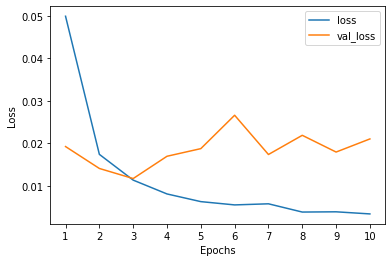

In [23]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

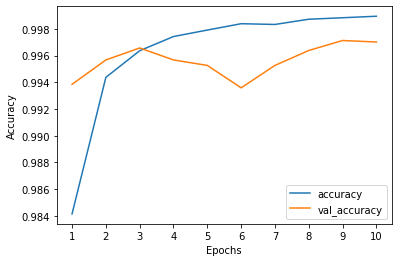

In [24]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [26]:
#save CNN model
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


In [27]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth',
        'No_Mask'], dtype='<U15')]